In [5]:
from torchmetrics import IoU
import torch
import matplotlib.pyplot as plt

In [1]:
from dataloaders.lidc import LIDC_SYN

In [3]:
d = LIDC_SYN()

Loading file data_lidc.pickle


In [8]:
d[0]['label'].shape

(3, 128, 128)

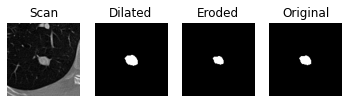

In [21]:
plt.subplot(1, 4, 1)
plt.imshow(d[0]['image'][0], cmap='gray')
plt.title('Scan')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(d[0]['label'][0], cmap='gray')
plt.title('Dilated')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(d[0]['label'][1], cmap='gray')
plt.title('Eroded')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(d[0]['label'][2], cmap='gray')
plt.title('Original')
plt.axis('off')
plt.savefig("synthetic.png", dpi=500, bbox_inches='tight')

In [13]:
a = torch.zeros((3, 4, 100, 100))
b = torch.zeros((3, 4, 100, 100))

In [14]:
a[:, :, 50:70, 50:70] = 1.
b[:, :, 60:80, 60:80] = 1.

In [19]:
a = a.int()
b = b.int()
a = a.reshape([-1, 1, 100, 100])
b = b.reshape([-1, 100, 100])

In [23]:
iou = IoU(1)
a.shape, b.shape

(torch.Size([12, 1, 100, 100]), torch.Size([12, 1, 100, 100]))

RuntimeError: shape '[1, 1]' is invalid for input of size 3

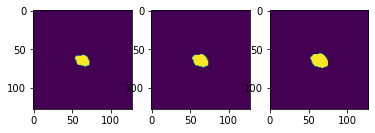

In [12]:
x = data[0]['label']
plt.subplot(1, 3, 1)
plt.imshow(x[0])
plt.subplot(1, 3, 2)
plt.imshow(x[1])
plt.subplot(1, 3, 3)
plt.imshow(x[2])

In [13]:
import scipy.stats as s
import numpy as np

In [18]:
q_s = np.load('/data/ssd/wanghao/bOEMD_run/lidc-syn/lidc-syn-shuffle/experiment_03/qubiq.npy')
ged_s = np.load('/data/ssd/wanghao/bOEMD_run/lidc-syn/lidc-syn-shuffle/experiment_03/ged.npy')
sd_s = np.load('/data/ssd/wanghao/bOEMD_run/lidc-syn/lidc-syn-shuffle/experiment_03/sd.npy')
sa_s = np.load('/data/ssd/wanghao/bOEMD_run/lidc-syn/lidc-syn-shuffle/experiment_03/sa.npy')

q_s = np.mean(q_s, axis=1)

In [33]:
q_u = np.load('/data/ssd/wanghao/bOEMD_run/lidc-syn/lidc-syn-shuffle/experiment_04/qubiq.npy')
ged_u = np.load('/data/ssd/wanghao/bOEMD_run/lidc-syn/lidc-syn-shuffle/experiment_04/ged.npy')
sd_u = np.load('/data/ssd/wanghao/bOEMD_run/lidc-syn/lidc-syn-shuffle/experiment_04/sd.npy')
sa_u = np.load('/data/ssd/wanghao/bOEMD_run/lidc-syn/lidc-syn-shuffle/experiment_04/sa.npy')

q_u = np.mean(q_u, axis=1)

In [ ]:
np.mean(ged_u)

In [34]:
# qubiq
s.ttest_ind(q_s, q_u)

Ttest_indResult(statistic=-3.7514623731738683, pvalue=0.0001791143382186842)

In [35]:
# ged
s.ttest_ind(ged_s, ged_u)

Ttest_indResult(statistic=2.512887490748402, pvalue=0.012026509565022122)

In [36]:
# sample diversity
s.ttest_ind(sd_s, sd_u)

Ttest_indResult(statistic=-4.948595766334791, pvalue=7.885280884542132e-07)

In [ ]:
# sample accuracy
s.ttest_ind(sa_s, sa_u)